In [1]:
!pip install yfinance

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 4.1 MB/s eta 0:00:004.3 MB/s eta 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=bb97af1a92059fb80a5c513763188b72c79e1283649584e1d6baea7dab70c423
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/1e/df/0f/e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
Successfully built multitasking
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [yfinance]━━ 4/5 [yfinance]]


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np

# 10-stock universe
tickers = ["NVDA","AAPL","MSFT","AMZN","GOOGL","GOOG","AVGO","META","TSLA","BRK-B"]

start = "2020-11-01"
end = "2025-11-01"  # Changed to current year since future data doesn't exist

# Download Adjusted Close prices
# First check what columns are available
data = yf.download(
    tickers,
    start=start,
    end=end,
    progress=False
)

# Print available columns to verify
print("Available columns:", data.columns.levels[0] if isinstance(data.columns, pd.MultiIndex) else data.columns)

# Then extract Adj Close (with error handling)
try:
    prices = data["Adj Close"]
except KeyError:
    # If "Adj Close" is not available, try "Close" instead
    prices = data["Close"]
    print("Note: Using 'Close' prices instead of 'Adj Close'")

# Clean
prices = prices.sort_index().ffill().dropna()

# Compute log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

print("Prices shape:", prices.shape)
print("Returns shape:", log_returns.shape)

prices.head(), log_returns.head()

Available columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Note: Using 'Close' prices instead of 'Adj Close'
Prices shape: (1256, 10)
Returns shape: (1255, 10)


(Ticker            AAPL        AMZN       AVGO       BRK-B       GOOG  \
 Date                                                                   
 2020-11-02  105.700043  150.223999  31.331736  204.309998  80.696259   
 2020-11-03  107.322906  152.420502  31.555635  206.630005  81.896271   
 2020-11-04  111.705620  162.057999  32.525249  206.169998  86.805443   
 2020-11-05  115.670471  166.100006  33.973869  207.449997  87.512146   
 2020-11-06  115.539040  165.568497  33.951569  208.850006  87.431747   
 
 Ticker          GOOGL        META        MSFT       NVDA        TSLA  
 Date                                                                  
 2020-11-02  80.606956  259.546997  193.636765  12.541766  133.503326  
 2020-11-03  81.665955  263.459625  197.560562  12.979155  141.300003  
 2020-11-04  86.637894  285.386505  207.092636  13.751502  140.326660  
 2020-11-05  87.464149  292.635834  213.696152  14.116121  146.029999  
 2020-11-06  87.326691  291.374695  214.107712  14.5168

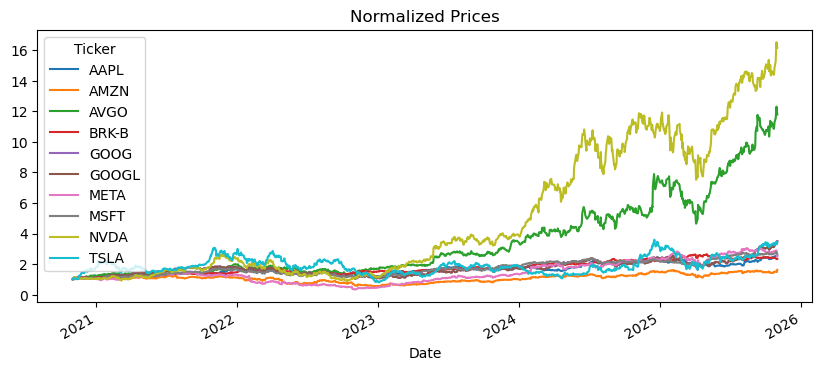

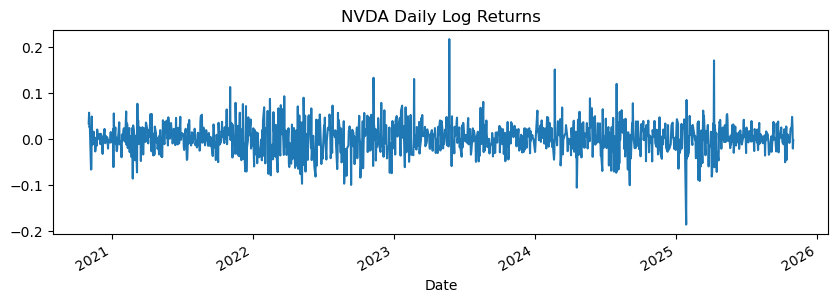

In [7]:
import matplotlib.pyplot as plt

(prices / prices.iloc[0]).plot(figsize=(10,4), title="Normalized Prices")
plt.show()

log_returns["NVDA"].plot(figsize=(10,3), title="NVDA Daily Log Returns")
plt.show()